In [1]:
!pip install openpyxl

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.colors as mcolors
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [3]:
dataset_path = 'Datasets/Dataset_BA1B.xlsx'

df = pd.read_excel(dataset_path)
# df.dropna(inplace=True)
# df['TOP_DEPTH'].fillna(method='ffill', inplace=True)
[c for c in df.columns]
geology_columns = ['UNIT_TYPE_Dunite',
 'UNIT_TYPE_Fault rock',
 'UNIT_TYPE_Gabbro',
 'UNIT_TYPE_Harzburgite',
 'UNIT_TYPE_Metagabbro',
 'UNIT_TYPE_Other',
'TOP_DEPTH'
 # 'UNIT_CLASS_OPHIO',
 # 'UNIT_CLASS_UND',
                  ]

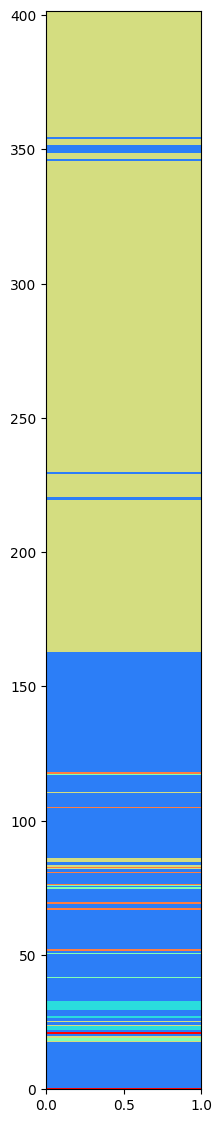

In [4]:
fig, ax = plt.subplots(figsize=(2, 14))
geo_df = df[geology_columns].copy()
geo_df.dropna(inplace=True)

Zs = []

for n, c in enumerate(geology_columns[:-1]):
    n = n + 1
    z = np.vstack(geo_df[c].values*n)
    Zs.append(z)

Z = np.zeros_like(z)
for z in Zs:
    Z += z
    
x = np.array([0, 1])
y = np.vstack(geo_df['TOP_DEPTH'].values)
xx, yy = np.meshgrid(x, y)
    
ax.pcolormesh(xx, yy, Z[:-1], vmin=0, vmax=6, cmap='rainbow', shading='auto')

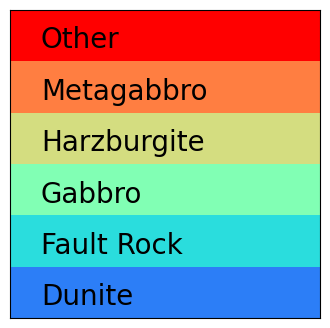

In [105]:
fig, ax = plt.subplots(figsize=(4,4))
ax.pcolormesh(np.vstack([1, 2, 3, 4, 5, 6]), cmap='rainbow', vmin=0, vmax=6)
ax.text(s='Dunite', x=0.1, y=0.25, fontsize=20)
ax.text(s='Fault Rock', x=0.1, y=1.25, fontsize=20)
ax.text(s='Gabbro', x=0.1, y=2.25, fontsize=20)
ax.text(s='Harzburgite', x=0.1, y=3.25, fontsize=20)
ax.text(s='Metagabbro', x=0.1, y=4.25, fontsize=20)
ax.text(s='Other', x=0.1, y=5.25, fontsize=20)
# ax.set_xlim(0, 0.6)
ax.set_yticks([])
ax.set_xticks([])
fig.savefig('geology_legend.pdf', bbox_inches='tight')

In [ ]:
	choices
32	[<OpenAIObject at 0x7f6699d84680> JSON: {
  "finish_reason": "stop",
  "index": 0,
  "message": {
    "content": "Keywords: \n1. Black Serpentine: Describes the color and composition of the rock. \n2. Vein Net: The network of veins within the rock, indicating its structure. \n3. Carb Veins: Carbonate veins found within the rock. \n4. Fractured: Indicates a break or crack within the rock. \n5. Lineation: A linear feature on an open crack within the rock. \n6. Serpentine Dunite: The specific type of rock being described. \n7. Magnetite: An iron oxide mineral found within the rock. \n8. Oxidation: The process of being exposed to oxygen, which can lead to changes in color or composition. \n9. Bulk Rock: The overall composition of the rock. \n10. 19-24 cm: Refers to a specific section of the rock.\n\nThese keywords were chosen because they highlight the specific characteristics and features of the rock described in the text. They provide a brief overview of the composition, structure, and potential changes within the rock due to natural processes.",
    "role": "assistant"
  }
}]

In [6]:
[c for c in df.columns]

['CORE',
 'SECTION',
 'Cell abundance (cells/g)',
 'Mean dry electrical Resistivity (ohmm)',
 'Bulk density (g/cm³)',
 'AMS bulk susceptibility',
 'LOI wt%',
 'CO2 wt%',
 'H20 wt%',
 'CaCO3 calc',
 'SECTION_UNIT',
 '% of fractures',
 'IMAGES',
 'SEGMENTATION',
 'TOP_DEPTH',
 'ALTERATION',
 'REMARKS1',
 'REMARKS2',
 'REMARKS4',
 'REMARKS5',
 'PnS2_sum',
 'PnL_sum',
 'PnP3V_sum',
 'PnP3H_sum',
 'PnP4_sum',
 'PnP6V_sum',
 'FnS2_sum',
 'FnL_sum',
 'FnP3V_sum',
 'FnP3H_sum',
 'FnP4_sum',
 'FnP6V_sum',
 'UNIT_TYPE_Dunite',
 'UNIT_TYPE_Fault rock',
 'UNIT_TYPE_Gabbro',
 'UNIT_TYPE_Harzburgite',
 'UNIT_TYPE_Metagabbro',
 'UNIT_TYPE_Other',
 'UNIT_CLASS_OPHIO',
 'UNIT_CLASS_UND',
 'TEXTURES_Brecciated',
 'TEXTURES_Sheared',
 'GRAINSIZE_Cryptocrystalline',
 'GRAINSIZE_Fine grained',
 'GRAINSIZE_Medium grained',
 'GRAINSIZE_Microcrystalline',
 'GRAINSIZE2_Coarse grained',
 'GRAINSIZE2_Cryptocrystalline',
 'GRAINSIZE2_Fine grained',
 'GRAINSIZE2_Medium grained',
 'GRAINSIZE2_Pegmatitic',
 'Alterat

# Figure 2
*NOTE: figure 1 is a process diagram*

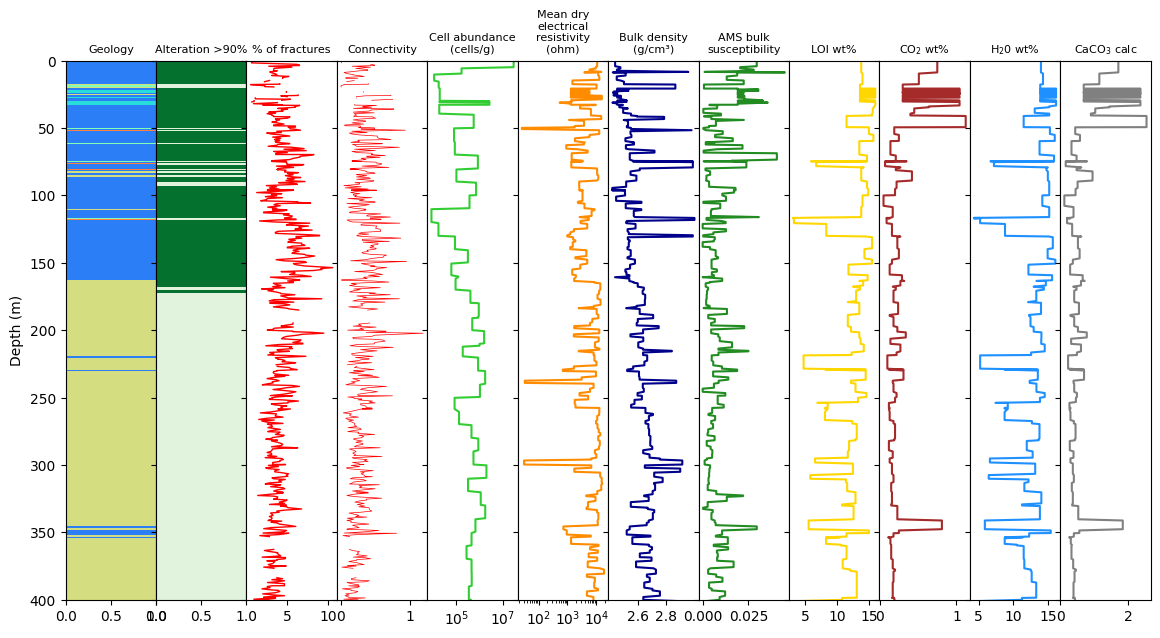

In [7]:
fig2_cols = ['Cell abundance (cells/g)',
 'Mean dry electrical Resistivity (ohmm)',
 'Bulk density (g/cm³)',
 'AMS bulk susceptibility',
 'LOI wt%',
 'CO2 wt%',
 'H20 wt%',
 'CaCO3 calc',
'% of fractures',
'TOP_DEPTH',
'ALTERATION',
'PnS2_sum',
 'PnL_sum',
 'PnP3V_sum',
 'PnP3H_sum',
 'PnP4_sum',
 'PnP6V_sum',
 'FnS2_sum',
 'FnL_sum',
 'FnP3V_sum',
 'FnP3H_sum',
 'FnP4_sum',
 'FnP6V_sum',
'Alteration_dummies_50%-90%',
 'Alteration_dummies_>90%',]

connectivity = ['PnS2_sum',
 'PnL_sum',
 'PnP3V_sum',
 'PnP3H_sum',
 'PnP4_sum',
 'PnP6V_sum',
 'FnS2_sum',
 'FnL_sum',
 'FnP3V_sum',
 'FnP3H_sum',
 'FnP4_sum',
 'FnP6V_sum',]

fig2_df = df[fig2_cols].copy()
fig2_df.sort_values(by='TOP_DEPTH', inplace=True)
fig, ax = plt.subplots(1, 12, figsize=(14, 7), sharey=True)

y = fig2_df.TOP_DEPTH
   
ax[0].pcolormesh(xx, yy, Z[:-1], vmin=0, vmax=6, cmap='rainbow', shading='auto')
ax[0].set_title('Geology', fontsize=8)

alt_df = fig2_df[['Alteration_dummies_>90%', 'TOP_DEPTH']].copy()
alt_df.dropna(inplace=True)

ax[1].pcolormesh(xx, yy, np.vstack(alt_df['Alteration_dummies_>90%'].values)[:-1], cmap='Greens', vmin=-0.2, vmax=1.2)
ax[1].set_title('Alteration >90%', fontsize=8)

ax[2].plot(fig2_df['% of fractures'], y, color='red', linewidth=1)
ax[2].set_title('% of fractures', fontsize=8)

for c in connectivity:
    if c == 'PnL_sum':
        color = 'red'
        ax[3].plot(fig2_df[c], y, color=color, linewidth=0.5)

    else:
        color = 'cyan'
    # ax[3].plot(fig2_df[c], y, color=color, linewidth=0.5)
ax[3].set_title('Connectivity', fontsize=8)
    
ax[4].plot(fig2_df['Cell abundance (cells/g)'], y, color='limegreen')
ax[4].set_xscale('log')
ax[4].set_title('Cell abundance\n(cells/g)', fontsize=8)

ax[5].plot(fig2_df['Mean dry electrical Resistivity (ohmm)'], y, color='darkorange')
ax[5].set_xscale('log')
ax[5].set_title('Mean dry\nelectrical\nresistivity\n(ohm)', fontsize=8)

ax[6].plot(fig2_df['Bulk density (g/cm³)'], y, color='darkblue')
ax[6].set_title('Bulk density\n(g/cm³)', fontsize=8)
ax[6].set_xticks([2.6, 2.8])

ax[7].plot(fig2_df['AMS bulk susceptibility'], y, color='forestgreen')
ax[7].set_title('AMS bulk\nsusceptibility', fontsize=8)

ax[8].plot(fig2_df['LOI wt%'], y, color='gold')
ax[8].set_title('LOI wt%', fontsize=8)

ax[9].plot(fig2_df['CO2 wt%'], y, color='brown')
ax[9].set_title(r'CO$_{2}$ wt%', fontsize=8)

ax[10].plot(fig2_df['H20 wt%'], y, color='dodgerblue')
ax[10].set_title('H$_{2}$0 wt%', fontsize=8)

ax[11].plot(fig2_df['CaCO3 calc'], y, color='grey')
ax[11].set_title('CaCO$_{3}$ calc', fontsize=8)

# ax[0].set_ylim(405, -5)
ax[0].set_ylabel('Depth (m)')
fig.subplots_adjust(wspace=0, hspace=0)
ax[0].set_ylim(400, 0)

# plt.tight_layout()
fig.savefig('physical_measurements.pdf', bbox_inches='tight')

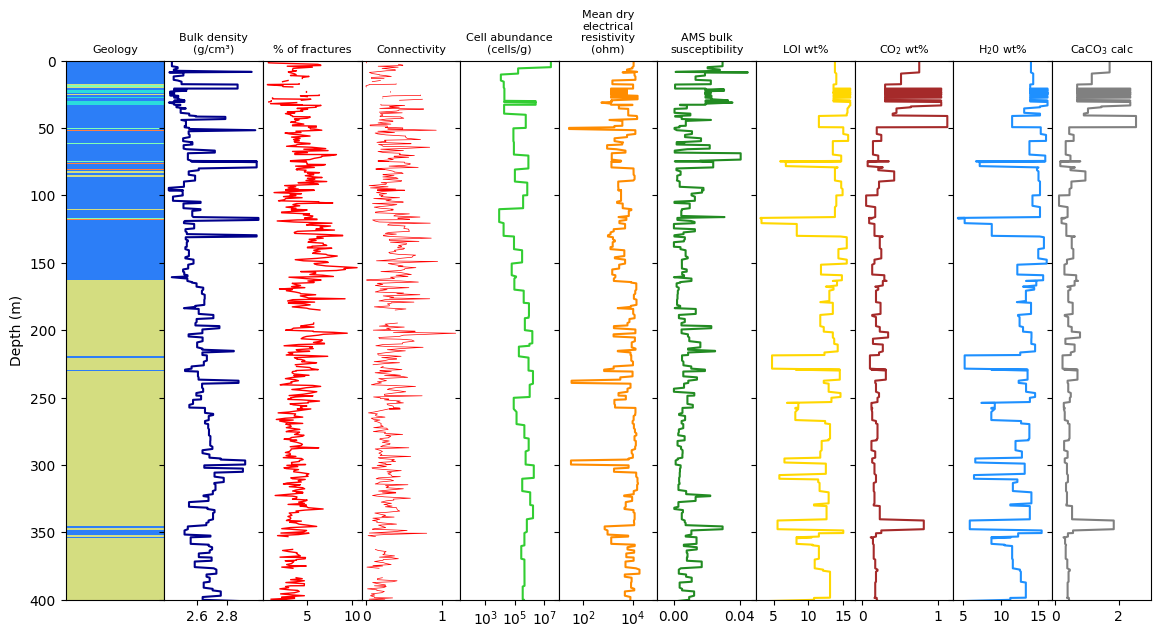

In [104]:
fig2_cols = ['Cell abundance (cells/g)',
 'Mean dry electrical Resistivity (ohmm)',
 'Bulk density (g/cm³)',
 'AMS bulk susceptibility',
 'LOI wt%',
 'CO2 wt%',
 'H20 wt%',
 'CaCO3 calc',
'% of fractures',
'TOP_DEPTH',
'ALTERATION',
'PnS2_sum',
 'PnL_sum',
 'PnP3V_sum',
 'PnP3H_sum',
 'PnP4_sum',
 'PnP6V_sum',
 'FnS2_sum',
 'FnL_sum',
 'FnP3V_sum',
 'FnP3H_sum',
 'FnP4_sum',
 'FnP6V_sum',
'Alteration_dummies_50%-90%',
 'Alteration_dummies_>90%',]

connectivity = ['PnS2_sum',
 'PnL_sum',
 'PnP3V_sum',
 'PnP3H_sum',
 'PnP4_sum',
 'PnP6V_sum',
 'FnS2_sum',
 'FnL_sum',
 'FnP3V_sum',
 'FnP3H_sum',
 'FnP4_sum',
 'FnP6V_sum',]

fig2_df = df[fig2_cols].copy()
fig2_df.sort_values(by='TOP_DEPTH', inplace=True)
# fig, ax = plt.subplots(1, 12, figsize=(14, 7), sharey=True)
fig, ax = plt.subplots(1, 11, figsize=(14, 7), sharey=True)

y = fig2_df.TOP_DEPTH
   
ax[0].pcolormesh(xx, yy, Z[:-1], vmin=0, vmax=6, cmap='rainbow', shading='auto')
ax[0].set_title('Geology', fontsize=8)
ax[0].set_xticks([])

# alt_df = fig2_df[['Alteration_dummies_>90%', 'TOP_DEPTH']].copy()
# alt_df.dropna(inplace=True)

# ax[1].pcolormesh(xx, yy, np.vstack(alt_df['Alteration_dummies_>90%'].values)[:-1], cmap='Greens', vmin=-0.2, vmax=1.2)
# ax[1].set_title('Alteration >90%', fontsize=8)

ax[1].plot(fig2_df['Bulk density (g/cm³)'], y, color='darkblue')
ax[1].set_title('Bulk density\n(g/cm³)', fontsize=8)
ax[1].set_xticks([2.6, 2.8])

ax[2].plot(fig2_df['% of fractures'], y, color='red', linewidth=1)
ax[2].set_title('% of fractures', fontsize=8)

for c in connectivity:
    if c == 'PnL_sum':
        color = 'red'
        ax[3].plot(fig2_df[c], y, color=color, linewidth=0.5)

    else:
        color = 'cyan'
    # ax[3].plot(fig2_df[c], y, color=color, linewidth=0.5)
ax[3].set_title('Connectivity', fontsize=8)
    
ax[4].plot(fig2_df['Cell abundance (cells/g)'], y, color='limegreen')
ax[4].set_xscale('log')
ax[4].set_title('Cell abundance\n(cells/g)', fontsize=8)
ax[4].set_xlim(1.9e1, 1e8)
ax[4].set_xticks([1e3, 1e5, 1e7])

ax[5].plot(fig2_df['Mean dry electrical Resistivity (ohmm)'], y, color='darkorange')
ax[5].set_xscale('log')
ax[5].set_title('Mean dry\nelectrical\nresistivity\n(ohm)', fontsize=8)
ax[5].set_xlim(1e1, 1e5)
ax[5].set_xticks([1e2, 1e4])

# ax[6].plot(fig2_df['Bulk density (g/cm³)'], y, color='darkblue')
# ax[6].set_title('Bulk density\n(g/cm³)', fontsize=8)
# ax[6].set_xticks([2.6, 2.8])

ax[6].plot(fig2_df['AMS bulk susceptibility'], y, color='forestgreen')
ax[6].set_title('AMS bulk\nsusceptibility', fontsize=8)
ax[6].set_xlim(-0.01, 0.05)
ax[6].set_xticks([0.0, 0.04])

ax[7].plot(fig2_df['LOI wt%'], y, color='gold')
ax[7].set_title('LOI wt%', fontsize=8)

ax[8].plot(fig2_df['CO2 wt%'], y, color='brown')
ax[8].set_title(r'CO$_{2}$ wt%', fontsize=8)
ax[8].set_xlim(-0.1, 1.2)

ax[9].plot(fig2_df['H20 wt%'], y, color='dodgerblue')
ax[9].set_title('H$_{2}$0 wt%', fontsize=8)

ax[10].plot(fig2_df['CaCO3 calc'], y, color='grey')
ax[10].set_title('CaCO$_{3}$ calc', fontsize=8)
ax[10].set_xlim(-0.1, 3)

# ax[0].set_ylim(405, -5)
ax[0].set_ylabel('Depth (m)')
fig.subplots_adjust(wspace=0, hspace=0)
ax[0].set_ylim(400, 0)

# plt.tight_layout()
fig.savefig('physical_measurements.pdf', bbox_inches='tight')

In [8]:
fig2_df[['% of fractures', 'Bulk density (g/cm³)', 'TOP_DEPTH']].corr()

,% of fractures,Bulk density (g/cm³),TOP_DEPTH
% of fractures,1.000000,-0.022502,-0.127984
Bulk density (g/cm³),-0.022502,1.000000,0.347463
TOP_DEPTH,-0.127984,0.347463,1.000000


<Axes: xlabel='Bulk density (g/cm³)', ylabel='% of fractures'>

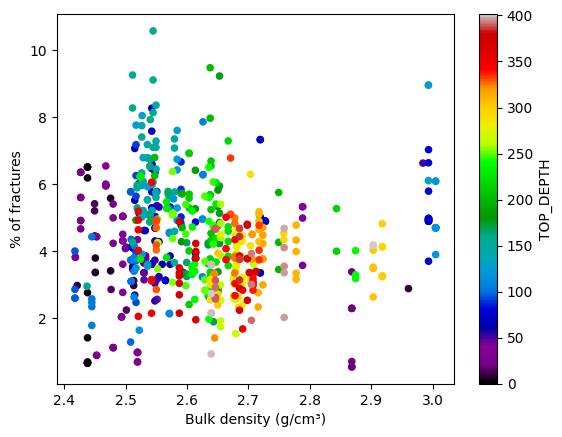

In [9]:
fig2_df.plot.scatter(y='% of fractures', x='Bulk density (g/cm³)', c='TOP_DEPTH', cmap='nipy_spectral')

,% of fractures,Bulk density (g/cm³),Bulk detrend,fracdiff,fracdiffmean,fracmean
% of fractures,1.000000,-0.033947,0.009993,0.462602,0.642166,0.512475
Bulk density (g/cm³),-0.033947,1.000000,0.918171,0.021437,-0.054463,-0.135106
Bulk detrend,0.009993,0.918171,1.000000,0.026485,-0.030936,-0.051267
fracdiff,0.462602,0.021437,0.026485,1.000000,0.415000,-0.032424
fracdiffmean,0.642166,-0.054463,-0.030936,0.415000,1.000000,0.059439
fracmean,0.512475,-0.135106,-0.051267,-0.032424,0.059439,1.000000


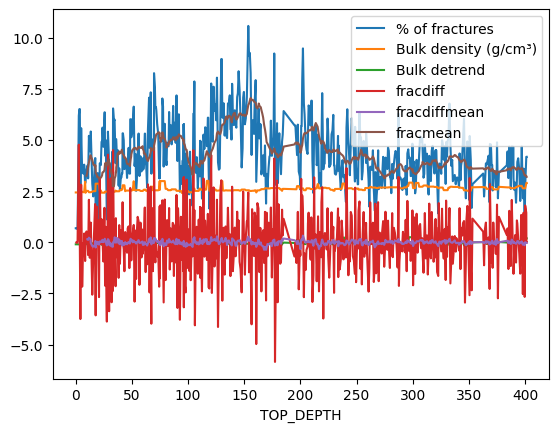

In [10]:
import scipy.signal as signal

bulk = fig2_df[['% of fractures','Bulk density (g/cm³)', 'TOP_DEPTH']].drop_duplicates().dropna().copy()

bulk['Bulk detrend'] =  signal.detrend(bulk['Bulk density (g/cm³)'].values, type='linear')
bulk['fracdiff'] = bulk['% of fractures'].diff()
bulk['fracdiffmean'] = bulk['% of fractures'].diff().rolling(20).mean()
bulk['fracmean'] = bulk['% of fractures'].rolling(20).mean()
bulk.set_index('TOP_DEPTH', inplace=True)
bulk.plot()
bulk.corr()

(400.0, 0.0)

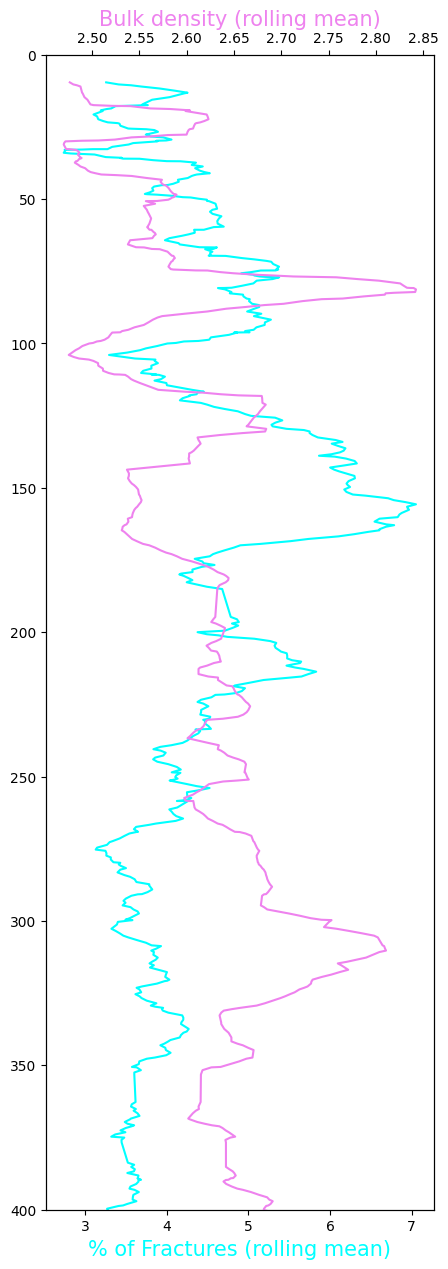

In [11]:
fig, ax = plt.subplots(figsize=(5,15))

ax.plot(bulk['fracmean'], bulk.index, color='cyan')
ax.set_xlabel('% of Fractures (rolling mean)', fontsize=15, color='cyan')

ax2 = ax.twiny()

ax2.plot(bulk['Bulk density (g/cm³)'].rolling(20).mean(), bulk.index, color='violet')
ax2.set_xlabel('Bulk density (rolling mean)', fontsize=15, color='violet')

ax.set_ylim(400, 0)

In [12]:
bulk125 = bulk.reset_index()
bulk125 = bulk125[bulk125.TOP_DEPTH < 125]
bulk125.corr()

,TOP_DEPTH,% of fractures,Bulk density (g/cm³),Bulk detrend,fracdiff,fracdiffmean,fracmean
TOP_DEPTH,1.000000,0.267973,0.251627,0.125898,-0.003703,-0.017136,0.480928
% of fractures,0.267973,1.000000,0.129023,0.095659,0.484862,0.677293,0.301706
Bulk density (g/cm³),0.251627,0.129023,1.000000,0.991776,-0.003755,-0.071103,0.282943
Bulk detrend,0.125898,0.095659,0.991776,1.000000,-0.003234,-0.070051,0.225558
fracdiff,-0.003703,0.484862,-0.003755,-0.003234,1.000000,0.401424,-0.044208
fracdiffmean,-0.017136,0.677293,-0.071103,-0.070051,0.401424,1.000000,0.073197
fracmean,0.480928,0.301706,0.282943,0.225558,-0.044208,0.073197,1.000000


<Axes: >

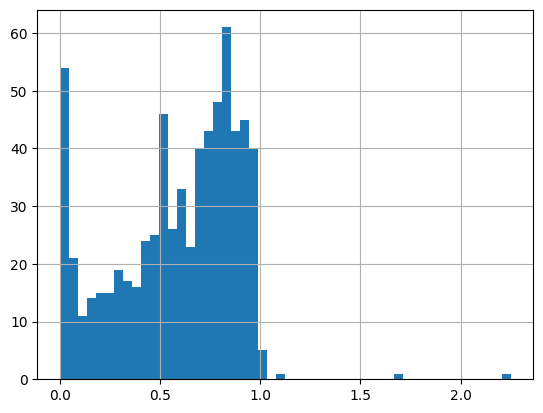

In [13]:
fig2_df.TOP_DEPTH.dropna().diff().hist(bins=50)

# Figure 3

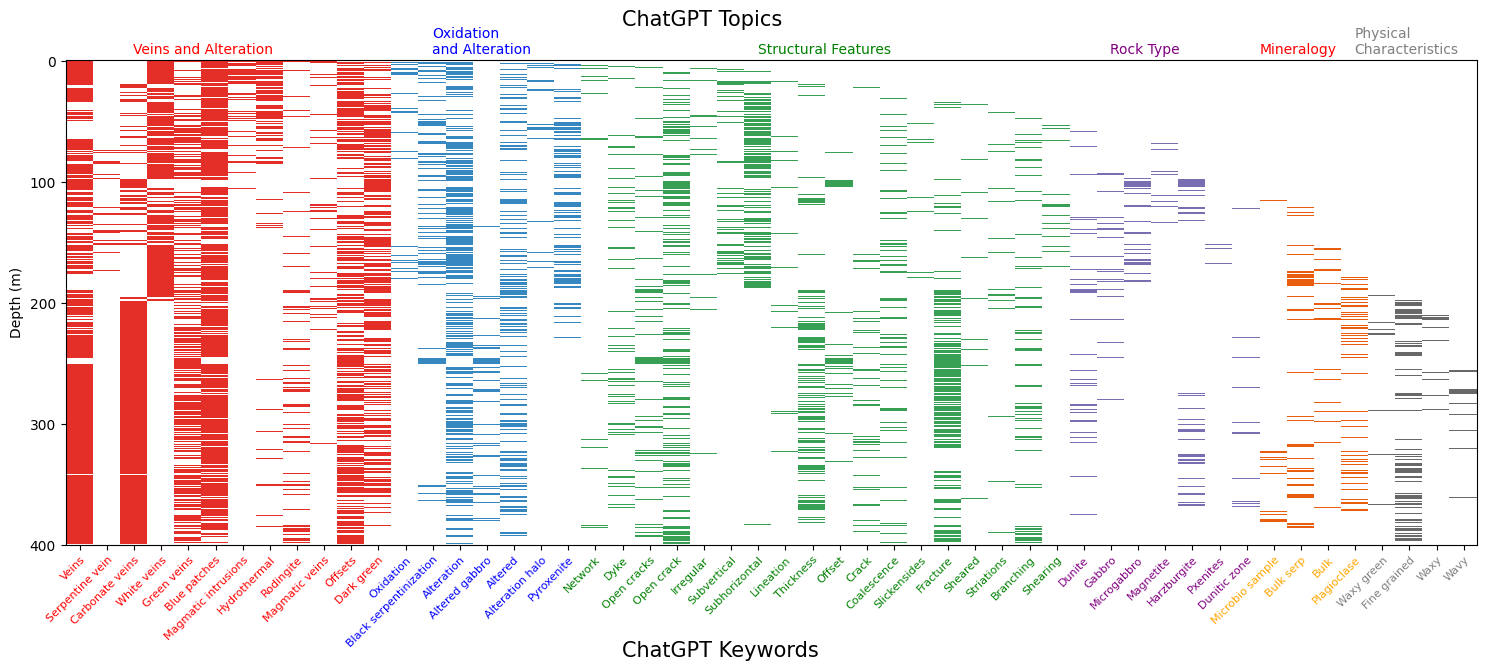

In [14]:
keywords=df.columns[49:]
K=[]
for i in keywords:
    K.append(i)

# plot the graph keyword.

data = df[K].to_numpy()
# row_labels = L
row_labels = df.index
col_labels = K

groups = [
    ['Veins', 'Serpentine vein', 'Carbonate veins', 'White veins', 'Green veins',
     'Blue patches', 'Magmatic veins', 'Dark green', 'Magmatic intrusions',
     'Hydrothermal', 'Offsets', 'Rodingite'],
    ['Oxidation', 'Black serpentinization', 'Alteration', 'Alteration halo',
     'Altered gabbro', 'Altered', 'Pyroxenite'],
    ['Network', 'Coalescence', 'Dyke', 'Shearing', 'Crack'
     ,  'Open cracks'
     , 'Open crack', 'Irregular', 'Subvertical',
     'Subhorizontal', 'Lineation', 'Thickness', 'Offset', 'Fracture',
     'Sheared', 'Striations', 'Branching', 'Slickensides'],
    ['Dunite', 'Gabbro', 'Microgabbro', 'Harzburgite', 'Pxenites', 'Dunitic zone','Magnetite'],
    ['Plagioclase', 'Microbio sample', 'Bulk serp', 'Bulk'],
    ['Fine grained', 'Waxy green', 'Waxy', 'Wavy']
]

colors = ['red', 'blue', 'green', 'purple', 'orange', 'grey']


sorted_cols = []
group_indices = []
for i, group in enumerate(groups):
    for col in col_labels:
        if col in group:
            sorted_cols.append(col)
            group_indices.append(i)

sorted_data = data[:, [col_labels.index(col) for col in sorted_cols]]

# plt.pcolormesh(sorted_data, cmap='Purples')

fig, ax = plt.subplots(figsize=(15, 7))

def plot_words(x, y, data, cmap):
    xx, yy = np.meshgrid(x, y)
    data[data == 0] = np.nan
    ax.pcolormesh(xx, yy, data, cmap=cmap, vmin=0, vmax=1.5)
    
plot_words(x=np.arange(0, 12, 1), y=np.arange(0, 690, 1), data=data[:, np.arange(0, 12, 1)], cmap='Reds')
plot_words(x=np.arange(12, 12+7, 1), y=np.arange(0, 690, 1), data=data[:, np.arange(12, 12+7, 1)], cmap='Blues')
plot_words(x=np.arange(12+7, 12+7+18, 1), y=np.arange(0, 690, 1)
           , data=data[:, np.arange(12+7, 12+7+18, 1)], cmap='Greens')
plot_words(x=np.arange(12+7+18, 12+7+18+7, 1), y=np.arange(0, 690, 1)
           , data=data[:, np.arange(12+7+18, 12+7+18+7, 1)], cmap='Purples')
plot_words(x=np.arange(12+7+18+7, 12+7+18+7+4, 1), y=np.arange(0, 690, 1)
           , data=data[:, np.arange(12+7+18+7, 12+7+18+7+4, 1)], cmap='Oranges')
plot_words(x=np.arange(12+7+18+7+4, 12+7+18+7+4+4, 1), y=np.arange(0, 690, 1)
           , data=data[:, np.arange(12+7+18+7+4, 12+7+18+7+4+4, 1)], cmap='Greys')
# plot_words(data[:, np.arange(13, 21, 1)], cmap='Blues')
# data1 = sorted_data[:, np.arange(0, 13, 1)]
# data1[data1 == 0] = np.nan
# plt.pcolormesh(data1, cmap='Reds', vmin=0, vmax=1.5)

# y_ticks = np.arange(0, 401.7, 100)
y_ticks = np.arange(0, 401, 100)
y_tick_positions = np.linspace(0, len(row_labels), len(y_ticks))
plt.yticks(y_tick_positions, y_ticks)
ax.set_ylabel('Depth (m)')

plt.xticks(np.arange(len(sorted_cols)) + 0.025, sorted_cols, rotation=45, ha="right", rotation_mode="anchor", fontsize=8)
plt.subplots_adjust(bottom=0.1)

for tick_label in plt.gca().get_xticklabels():
    label = tick_label.get_text()
    for i, group in enumerate(groups):
        if label in group:
            tick_label.set_color(colors[i])

plt.gca().invert_yaxis()

ax.text(s='Veins and Alteration', color='red', x=2, y= -10)
ax.text(s='Oxidation\nand Alteration', color='blue', x=13, y= -10)
ax.text(s='Structural Features', color='green', x=25, y= -10)
ax.text(s='Rock Type', color='purple', x=38, y= -10)
ax.text(s='Mineralogy', color='red', x=43.5, y= -10)
ax.text(s='Physical\nCharacteristics', color='grey', x=47, y= -10)

ax.text(s='ChatGPT Keywords', color='black', x=20, y=850, fontsize=15)
ax.text(s='ChatGPT Topics', color='black', x=20, y=-50, fontsize=15)

fig.tight_layout()

fig.savefig('topics_keywords.pdf', bbox_inches='tight')

# plt.xlabel("Columns")

# plt.show()# plot the graph keyword. For coloring each section of a different color, you have to crop by hand the graph for each color then make a little montage.

In [15]:
df['GRAINSIZE_Cryptocrystalline'].unique()

array([0, 1])

In [16]:
[c for c in df.columns]

columns_dont_use = ['CORE',
 'SECTION',
 'IMAGES',
 'SEGMENTATION',
 'TOP_DEPTH',
 'ALTERATION',
 'REMARKS1',
 'REMARKS2',
 'REMARKS4',
 'REMARKS5',
 'Alteration_dummies_50%-90%',
'Alteration_dummies_>90%',
'SECTION_UNIT']

In [17]:
!pip install catboost

In [46]:
def meow(df, X_cols, Y_col):
    
    X = df[X_cols].copy()
    y = df[Y_col].copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7
                                                        , random_state=42)

    
    model = CatBoostClassifier(iterations=1000, 
                           learning_rate=0.1, 
                           depth=3,
                           verbose=False)
    
    # model.fit(X_train, y_train)
    # model.fit(X_train, y_train, use_best_model=True)
    model.fit(X_train, y_train, early_stopping_rounds=10)
        
    # do predictions
    predictions = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]
    print('Accuracy:', metrics.accuracy_score(y_test, predictions))
    
    # do ROC
    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
    plt.hist(probs, bins=50)
    roc_auc = metrics.auc(fpr, tpr)
    print('AUC:', roc_auc)
    
    print('total true', y_test.sum())
    
    return {'fpr':fpr, 'tpr':tpr}

Accuracy: 0.9585921325051759
AUC: 0.9903951798688642
total true 198


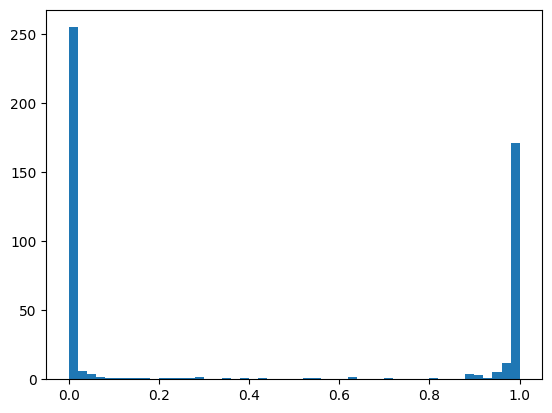

In [47]:
X = df.drop(columns_dont_use, axis=1)
results = meow(df=df, X_cols=X.columns, Y_col='Alteration_dummies_>90%')
# results['ci_df'].pivot_table(index='thresholds', columns='run', values='fpr') #.groupby('run').mean().sort_values(by=['fpr','tpr']).plot(x='fpr', y='tpr')

---catboost for chemistry and biology---
Accuracy: 0.8985507246376812
AUC: 0.9418040049618998
total true 198
---catboost for fractures---
Accuracy: 0.6935817805383023
AUC: 0.7424508240297714
total true 198
---catboost for geology---
Accuracy: 0.927536231884058
AUC: 0.9852117667907142
total true 198
---catboost for physics---
Accuracy: 0.8592132505175983
AUC: 0.8979797979797981
total true 198
---catboost for chatgpt---
Accuracy: 0.8592132505175983
AUC: 0.9268651426546164
total true 198
---catboost for other---
Accuracy: 0.855072463768116
AUC: 0.9242069821017189
total true 198


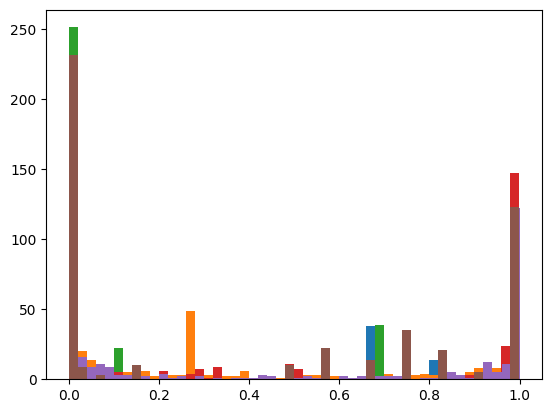

In [48]:
chemistry_biology = ['Cell abundance (cells/g)','LOI wt%',
 'CO2 wt%',
 'H20 wt%',
 'CaCO3 calc',
'SiO2',
 'TiO2',
 'Al2O3',
 'Fe2O3t',
 'MnO',
 'MgO',
 'CaO',
 'Na2O',
 'K2O',
 'P2O5',
 '100*Fe(III)/FeT',
]
print('---catboost for chemistry and biology---')
cb = meow(df=df, X_cols=chemistry_biology, Y_col='Alteration_dummies_>90%')

fractures = ['% of fractures',
 'PnS2_sum',
 'PnL_sum',
 'PnP3V_sum',
 'PnP3H_sum',
 'PnP4_sum',
 'PnP6V_sum',
 'FnS2_sum',
 'FnL_sum',
 'FnP3V_sum',
 'FnP3H_sum',
 'FnP4_sum',
 'FnP6V_sum',]
print('---catboost for fractures---')
frac = meow(df=df, X_cols=fractures, Y_col='Alteration_dummies_>90%')

geology = ['UNIT_TYPE_Dunite',
 'UNIT_TYPE_Fault rock',
 'UNIT_TYPE_Gabbro',
 'UNIT_TYPE_Harzburgite',
 'UNIT_TYPE_Metagabbro',
 'UNIT_TYPE_Other',
 'UNIT_CLASS_OPHIO',
 'UNIT_CLASS_UND',
 'TEXTURES_Brecciated',
 'TEXTURES_Sheared',
 'GRAINSIZE_Cryptocrystalline',
 'GRAINSIZE_Fine grained',
 'GRAINSIZE_Medium grained',
 'GRAINSIZE_Microcrystalline',
 'GRAINSIZE2_Coarse grained',
 'GRAINSIZE2_Cryptocrystalline',
 'GRAINSIZE2_Fine grained',
 'GRAINSIZE2_Medium grained',
 'GRAINSIZE2_Pegmatitic',]
print('---catboost for geology---')
geo = meow(df=df, X_cols=geology, Y_col='Alteration_dummies_>90%')

physics = ['Mean dry electrical Resistivity (ohmm)',
 'Bulk density (g/cm³)',
 'AMS bulk susceptibility',]
print('---catboost for physics---')
phys = meow(df=df, X_cols=physics, Y_col='Alteration_dummies_>90%')

chatgpt = [ 'Veins',
 'Serpentine vein',
 'Oxidation',
 'Carbonate veins',
 'Network',
 'Dyke',
 'Black serpentinization',
 'White veins',
 'Open cracks',
 'Dunite',
 'Gabbro',
 'Microgabbro',
 'Green veins',
 'Open crack',
 'Irregular',
 'Waxy green',
 'Alteration',
 'Subvertical',
 'Fine grained',
 'Subhorizontal',
 'Lineation',
 'Magnetite',
 'Thickness',
 'Harzburgite',
 'Altered gabbro',
 'Offset',
 'Altered',
 'Crack',
 'Pxenites',
 'Microbio sample',
 'Bulk serp',
 'Bulk',
 'Coalescence',
           'Waxy',
 'Wavy',
 'Slickensides',
 'Alteration halo',
 'Plagioclase',
 'Fracture',
 'Sheared',
 'Pyroxenite',
 'Striations',
 'Branching',
 'Blue patches',
 'Magmatic intrusions',
 'Hydrothermal',
 'Rodingite',
 'Magmatic veins',
 'Offsets',
 'Shearing',
 'Dark green',
 'Dunitic zone',]
print('---catboost for chatgpt---')
gpt = meow(df=df, X_cols=chatgpt, Y_col='Alteration_dummies_>90%')


other = ['Vrecal',
 'Crrecal',
 'Co',
 'Nirecal',
 'Curecal',
 'Znrecal',
 'Srrecal',
 'Redness',
 'Greenness',
 'Blueness',
 'Y (luminance)']
print('---catboost for other---')
oth = meow(df=df, X_cols=other, Y_col='Alteration_dummies_>90%')


In [49]:
# def plot_with_ci(fpr, tpr, label, color, ax):
#     ax.plot(fpr, tpr, label=label, color=color)
#     n_bootstraps = fpr.shape[0]
#     rng = np.random.RandomState(42)
#     bs_scores = []
    
#     for i in range(n_bootstraps):
#         indices = rng.randint(0, len(y_

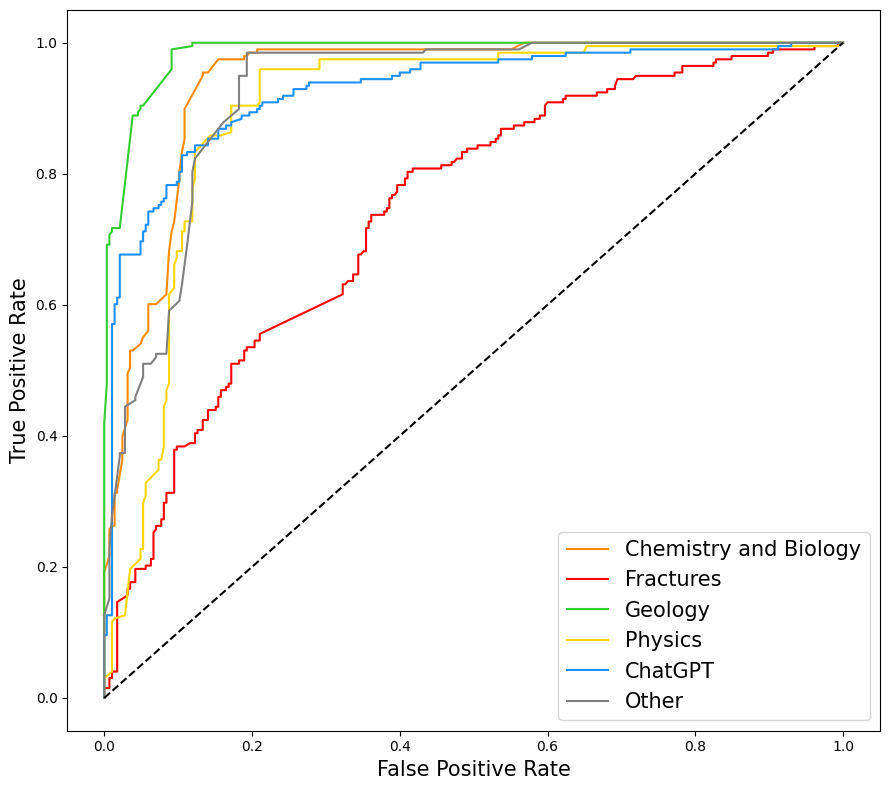

In [50]:
fig, ax = plt.subplots(figsize=(9, 8))

ax.plot(cb['fpr'], cb['tpr'], label='Chemistry and Biology', color='darkorange')
ax.plot(frac['fpr'], frac['tpr'], color='red', label='Fractures')
ax.plot(geo['fpr'], geo['tpr'], color='limegreen', label='Geology')
ax.plot(phys['fpr'], phys['tpr'], color='gold', label='Physics')
ax.plot(gpt['fpr'], gpt['tpr'], color='dodgerblue', label='ChatGPT')
ax.plot(oth['fpr'], oth['tpr'], color='grey', label='Other')
ax.plot((0, 1), (0, 1), linestyle='--', color='black')

ax.legend(fontsize=15)
ax.set_ylabel('True Positive Rate', fontsize=15)
ax.set_xlabel('False Positive Rate', fontsize=15)
fig.tight_layout()
fig.savefig('roc.pdf', bbox_inches='tight')

In [51]:
[c for c in df.columns]

['CORE',
 'SECTION',
 'Cell abundance (cells/g)',
 'Mean dry electrical Resistivity (ohmm)',
 'Bulk density (g/cm³)',
 'AMS bulk susceptibility',
 'LOI wt%',
 'CO2 wt%',
 'H20 wt%',
 'CaCO3 calc',
 'SECTION_UNIT',
 '% of fractures',
 'IMAGES',
 'SEGMENTATION',
 'TOP_DEPTH',
 'ALTERATION',
 'REMARKS1',
 'REMARKS2',
 'REMARKS4',
 'REMARKS5',
 'PnS2_sum',
 'PnL_sum',
 'PnP3V_sum',
 'PnP3H_sum',
 'PnP4_sum',
 'PnP6V_sum',
 'FnS2_sum',
 'FnL_sum',
 'FnP3V_sum',
 'FnP3H_sum',
 'FnP4_sum',
 'FnP6V_sum',
 'UNIT_TYPE_Dunite',
 'UNIT_TYPE_Fault rock',
 'UNIT_TYPE_Gabbro',
 'UNIT_TYPE_Harzburgite',
 'UNIT_TYPE_Metagabbro',
 'UNIT_TYPE_Other',
 'UNIT_CLASS_OPHIO',
 'UNIT_CLASS_UND',
 'TEXTURES_Brecciated',
 'TEXTURES_Sheared',
 'GRAINSIZE_Cryptocrystalline',
 'GRAINSIZE_Fine grained',
 'GRAINSIZE_Medium grained',
 'GRAINSIZE_Microcrystalline',
 'GRAINSIZE2_Coarse grained',
 'GRAINSIZE2_Cryptocrystalline',
 'GRAINSIZE2_Fine grained',
 'GRAINSIZE2_Medium grained',
 'GRAINSIZE2_Pegmatitic',
 'Alterat

In [52]:
geo_comp = ['SiO2', 'TiO2', 'Al2O3', 'Fe2O3t', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', '100*Fe(III)/FeT'
            , 'Vrecal', 'Crrecal', 'Co', 'Nirecal', 'Curecal', 'Znrecal', 'Srrecal']

physical_props = ['Mean dry electrical Resistivity (ohmm)', 'Bulk density (g/cm³)', 'AMS bulk susceptibility'
                  , 'LOI wt%', 'CO2 wt%', 'H20 wt%', 'CaCO3 calc']

bio = ['Cell abundance (cells/g)',]

fractures = ['% of fractures', 'PnS2_sum', 'PnL_sum', 'PnP3V_sum', 'PnP3H_sum', 'PnP4_sum', 'PnP6V_sum'
             , 'FnS2_sum', 'FnL_sum', 'FnP3V_sum', 'FnP3H_sum', 'FnP4_sum', 'FnP6V_sum']

rock_type = ['UNIT_TYPE_Dunite', 'UNIT_TYPE_Fault rock', 'UNIT_TYPE_Gabbro', 'UNIT_TYPE_Harzburgite'
             , 'UNIT_TYPE_Metagabbro', 'UNIT_TYPE_Other', 'UNIT_CLASS_OPHIO', 'UNIT_CLASS_UND']

textural = ['TEXTURES_Brecciated', 'TEXTURES_Sheared', 'GRAINSIZE_Cryptocrystalline', 'GRAINSIZE_Fine grained'
            , 'GRAINSIZE_Medium grained', 'GRAINSIZE_Microcrystalline', 'GRAINSIZE2_Coarse grained'
            , 'GRAINSIZE2_Cryptocrystalline', 'GRAINSIZE2_Fine grained', 'GRAINSIZE2_Medium grained', 'GRAINSIZE2_Pegmatitic']

color_viz = ['Redness', 'Greenness', 'Blueness', 'Y (luminance)']

---gpt geo comp---
Accuracy: 0.8757763975155279
AUC: 0.9290625553783448
total true 198
---gpt physical props---
Accuracy: 0.8799171842650103
AUC: 0.9175615807194755
total true 198
---gpt bio---
Accuracy: 0.8923395445134575
AUC: 0.9510455431508064
total true 198
---gpt fractures---
Accuracy: 0.6935817805383023
AUC: 0.7424508240297714
total true 198
---gpt rock type---
Accuracy: 0.9130434782608695
AUC: 0.917224880382775
total true 198
---gpt textural---
Accuracy: 0.8716356107660456
AUC: 0.887586390217969
total true 198
---gpt color visualization---
Accuracy: 0.8488612836438924
AUC: 0.9233120680489101
total true 198


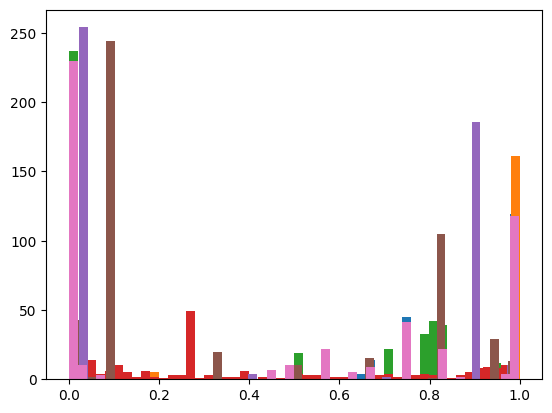

In [53]:
print('---gpt geo comp---')
gc_cb = meow(df=df, X_cols=geo_comp, Y_col='Alteration_dummies_>90%')

print('---gpt physical props---')
ph_cb = meow(df=df, X_cols=physical_props, Y_col='Alteration_dummies_>90%')

print('---gpt bio---')
bi_cb = meow(df=df, X_cols=bio, Y_col='Alteration_dummies_>90%')

print('---gpt fractures---')
fr_cb = meow(df=df, X_cols=fractures, Y_col='Alteration_dummies_>90%')

print('---gpt rock type---')
rt_cb = meow(df=df, X_cols=rock_type, Y_col='Alteration_dummies_>90%')

print('---gpt textural---')
tx_cb = meow(df=df, X_cols=textural, Y_col='Alteration_dummies_>90%')

print('---gpt color visualization---')
cv_cb = meow(df=df, X_cols=color_viz, Y_col='Alteration_dummies_>90%')

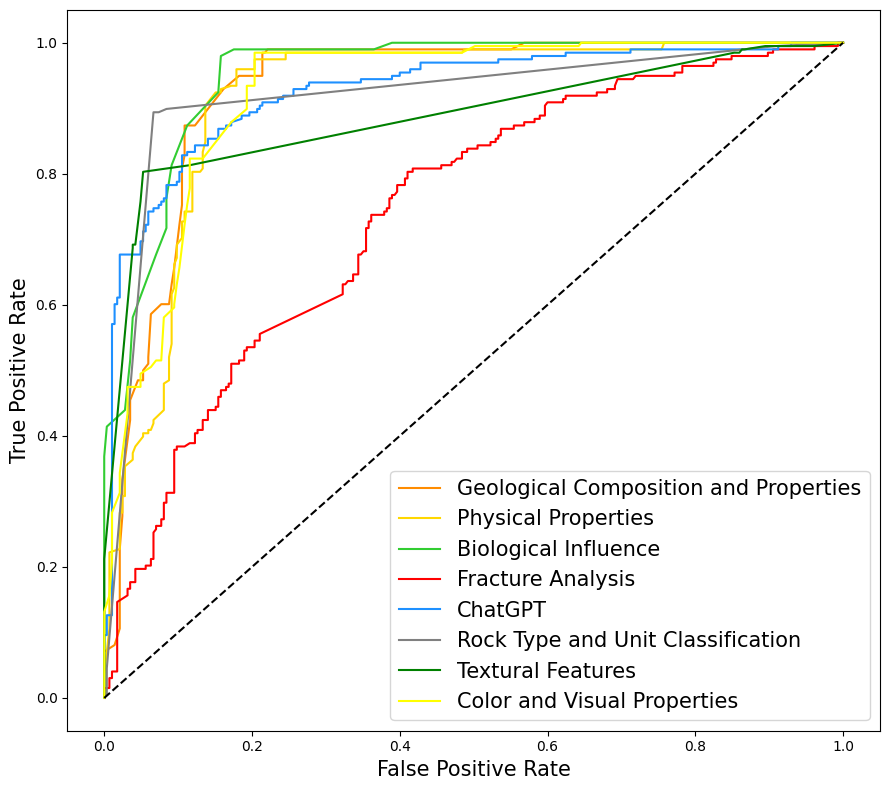

In [54]:
fig, ax = plt.subplots(figsize=(9, 8))

ax.plot(gc_cb['fpr'], gc_cb['tpr'], label='Geological Composition and Properties', color='darkorange')
ax.plot(ph_cb['fpr'], ph_cb['tpr'], color='gold', label='Physical Properties')
ax.plot(bi_cb['fpr'], bi_cb['tpr'], color='limegreen', label='Biological Influence')
ax.plot(fr_cb['fpr'], fr_cb['tpr'], color='red', label='Fracture Analysis')
ax.plot(gpt['fpr'], gpt['tpr'], color='dodgerblue', label='ChatGPT')
ax.plot(rt_cb['fpr'], rt_cb['tpr'], color='grey', label='Rock Type and Unit Classification')
ax.plot(tx_cb['fpr'], tx_cb['tpr'], color='green', label='Textural Features')
ax.plot(cv_cb['fpr'], cv_cb['tpr'], color='yellow', label='Color and Visual Properties')
ax.plot((0, 1), (0, 1), linestyle='--', color='black')

ax.legend(fontsize=15)
ax.set_ylabel('True Positive Rate', fontsize=15)
ax.set_xlabel('False Positive Rate', fontsize=15)
fig.tight_layout()
fig.savefig('roc_using_gpt_classifications.pdf', bbox_inches='tight')

<Axes: >

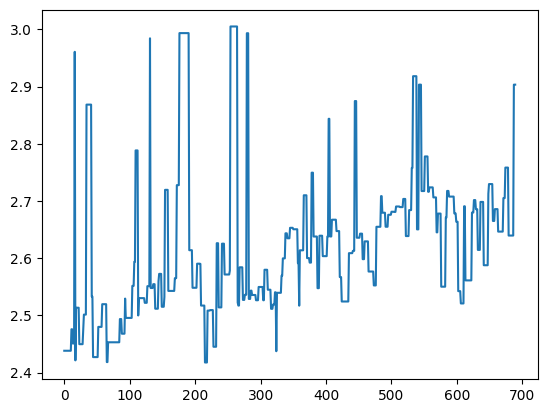

In [27]:
df['Bulk density (g/cm³)'].plot()

In [28]:
xvars = [
    # 'CORE',
 # 'SECTION',
 'Cell abundance (cells/g)',
 'Mean dry electrical Resistivity (ohmm)',
 # 'Bulk density (g/cm³)',
 'AMS bulk susceptibility',
 'LOI wt%',
 'CO2 wt%',
 'H20 wt%',
 'CaCO3 calc',
 # 'SECTION_UNIT',
 '% of fractures',
 # 'IMAGES',
 # 'SEGMENTATION',
 # 'TOP_DEPTH',
 # 'ALTERATION',
 # 'REMARKS1',
 # 'REMARKS2',
 # 'REMARKS4',
 # 'REMARKS5',
 'PnS2_sum',
 'PnL_sum',
 'PnP3V_sum',
 'PnP3H_sum',
 'PnP4_sum',
 'PnP6V_sum',
 'FnS2_sum',
 'FnL_sum',
 'FnP3V_sum',
 'FnP3H_sum',
 'FnP4_sum',
 'FnP6V_sum',
 'UNIT_TYPE_Dunite',
 'UNIT_TYPE_Fault rock',
 'UNIT_TYPE_Gabbro',
 'UNIT_TYPE_Harzburgite',
 'UNIT_TYPE_Metagabbro',
 'UNIT_TYPE_Other',
 'UNIT_CLASS_OPHIO',
 'UNIT_CLASS_UND',
 'TEXTURES_Brecciated',
 'TEXTURES_Sheared',
 'GRAINSIZE_Cryptocrystalline',
 'GRAINSIZE_Fine grained',
 'GRAINSIZE_Medium grained',
 'GRAINSIZE_Microcrystalline',
 'GRAINSIZE2_Coarse grained',
 'GRAINSIZE2_Cryptocrystalline',
 'GRAINSIZE2_Fine grained',
 'GRAINSIZE2_Medium grained',
 'GRAINSIZE2_Pegmatitic',
 # 'Alteration_dummies_50%-90%',
 # 'Alteration_dummies_>90%',
 'Veins',
 'Serpentine vein',
 'Oxidation',
 'Carbonate veins',
 'Network',
 'Dyke',
 'Black serpentinization',
 'White veins',
 'Open cracks',
 'Dunite',
 'Gabbro',
 'Microgabbro',
 'Green veins',
 'Open crack',
 'Irregular',
 'Waxy green',
 'Alteration',
 'Subvertical',
 'Fine grained',
 'Subhorizontal',
 'Lineation',
 'Magnetite',
 'Thickness',
 'Harzburgite',
 'Altered gabbro',
 'Offset',
 'Altered',
 'Crack',
 'Pxenites',
 'Microbio sample',
 'Bulk serp',
 'Bulk',
 'Coalescence',
 'Waxy',
 'Wavy',
 'Slickensides',
 'Alteration halo',
 'Plagioclase',
 'Fracture',
 'Sheared',
 'Pyroxenite',
 'Striations',
 'Branching',
 'Blue patches',
 'Magmatic intrusions',
 'Hydrothermal',
 'Rodingite',
 'Magmatic veins',
 'Offsets',
 'Shearing',
 'Dark green',
 'Dunitic zone',
 'SiO2',
 'TiO2',
 'Al2O3',
 'Fe2O3t',
 'MnO',
 'MgO',
 'CaO',
 'Na2O',
 'K2O',
 'P2O5',
 '100*Fe(III)/FeT',
 'Vrecal',
 'Crrecal',
 'Co',
 'Nirecal',
 'Curecal',
 'Znrecal',
 'Srrecal',
 'Redness',
 'Greenness',
 'Blueness',
 'Y (luminance)']

In [106]:
geo_comp = ['SiO2', 'TiO2', 'Al2O3', 'Fe2O3t', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', '100*Fe(III)/FeT'
            , 'Vrecal', 'Crrecal', 'Co', 'Nirecal', 'Curecal', 'Znrecal', 'Srrecal']

physical_props = ['Mean dry electrical Resistivity (ohmm)', 'AMS bulk susceptibility'
                  , 'LOI wt%', 'CO2 wt%', 'H20 wt%', 'CaCO3 calc']

bio = ['Cell abundance (cells/g)',]

fractures = ['% of fractures', 'PnS2_sum', 'PnL_sum', 'PnP3V_sum', 'PnP3H_sum', 'PnP4_sum', 'PnP6V_sum'
             , 'FnS2_sum', 'FnL_sum', 'FnP3V_sum', 'FnP3H_sum', 'FnP4_sum', 'FnP6V_sum']

rock_type = ['UNIT_TYPE_Dunite', 'UNIT_TYPE_Fault rock', 'UNIT_TYPE_Gabbro', 'UNIT_TYPE_Harzburgite'
             , 'UNIT_TYPE_Metagabbro', 'UNIT_TYPE_Other', 'UNIT_CLASS_OPHIO', 'UNIT_CLASS_UND']

textural = ['TEXTURES_Brecciated', 'TEXTURES_Sheared', 'GRAINSIZE_Cryptocrystalline', 'GRAINSIZE_Fine grained'
            , 'GRAINSIZE_Medium grained', 'GRAINSIZE_Microcrystalline', 'GRAINSIZE2_Coarse grained'
            , 'GRAINSIZE2_Cryptocrystalline', 'GRAINSIZE2_Fine grained', 'GRAINSIZE2_Medium grained', 'GRAINSIZE2_Pegmatitic']

color_viz = ['Redness', 'Greenness', 'Blueness', 'Y (luminance)']

chatgpt

['Veins',
 'Serpentine vein',
 'Oxidation',
 'Carbonate veins',
 'Network',
 'Dyke',
 'Black serpentinization',
 'White veins',
 'Open cracks',
 'Dunite',
 'Gabbro',
 'Microgabbro',
 'Green veins',
 'Open crack',
 'Irregular',
 'Waxy green',
 'Alteration',
 'Subvertical',
 'Fine grained',
 'Subhorizontal',
 'Lineation',
 'Magnetite',
 'Thickness',
 'Harzburgite',
 'Altered gabbro',
 'Offset',
 'Altered',
 'Crack',
 'Pxenites',
 'Microbio sample',
 'Bulk serp',
 'Bulk',
 'Coalescence',
 'Waxy',
 'Wavy',
 'Slickensides',
 'Alteration halo',
 'Plagioclase',
 'Fracture',
 'Sheared',
 'Pyroxenite',
 'Striations',
 'Branching',
 'Blue patches',
 'Magmatic intrusions',
 'Hydrothermal',
 'Rodingite',
 'Magmatic veins',
 'Offsets',
 'Shearing',
 'Dark green',
 'Dunitic zone']

In [110]:
def meow_reg(df, X_cols, Y_col):
    from catboost import CatBoostRegressor, Pool

    X = df[X_cols]
    y = df[Y_col]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    train_pool = Pool(X_train, y_train)
    eval_pool = Pool(X_test, y_test)
    
    # Instantiate the CatBoost regressor
    catboost_reg = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE')
    
    # Fit the model to the training data
    catboost_reg.fit(X_train, y_train, eval_set=eval_pool, verbose=100, early_stopping_rounds=10)
    
    # Predict on the test data
    y_pred = catboost_reg.predict(X_test)
    
    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)
    print('r2 score:', r2_score(y_test, y_pred))
    print('\n')

In [114]:
print('############ CHATGPT SELECTED ##############\n')
print('-------- everything --------')
meow_reg(df=df, X_cols=xvars, Y_col='Bulk density (g/cm³)')

print('-------- geo --------')
meow_reg(df=df, X_cols=geo_comp, Y_col='Bulk density (g/cm³)')

print('-------- physics --------')
meow_reg(df=df, X_cols=physical_props, Y_col='Bulk density (g/cm³)')

print('-------- bio --------')
meow_reg(df=df, X_cols=bio, Y_col='Bulk density (g/cm³)')

print('-------- fractures --------')
meow_reg(df=df, X_cols=fractures, Y_col='Bulk density (g/cm³)')

print('-------- rock type --------')
meow_reg(df=df, X_cols=rock_type, Y_col='Bulk density (g/cm³)')

print('-------- textural --------')
meow_reg(df=df, X_cols=textural, Y_col='Bulk density (g/cm³)')

print('-------- colorviz --------')
meow_reg(df=df, X_cols=color_viz, Y_col='Bulk density (g/cm³)')

print('-------- chatgpt ---------')
meow_reg(df=df, X_cols=chatgpt, Y_col='Bulk density (g/cm³)')

############ CHATGPT SELECTED ##############

-------- everything --------
0:	learn: 0.1219807	test: 0.1311659	best: 0.1311659 (0)	total: 2.42ms	remaining: 2.42s
100:	learn: 0.0229616	test: 0.0643115	best: 0.0643115 (100)	total: 187ms	remaining: 1.66s
200:	learn: 0.0095460	test: 0.0590303	best: 0.0590303 (200)	total: 372ms	remaining: 1.48s
300:	learn: 0.0054173	test: 0.0581602	best: 0.0581602 (300)	total: 564ms	remaining: 1.31s
400:	learn: 0.0035429	test: 0.0575682	best: 0.0575682 (400)	total: 756ms	remaining: 1.13s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.05746377356
bestIteration = 466

Shrink model to first 467 iterations.
Mean Squared Error: 0.0033020847652445633
r2 score: 0.8218355531631472


-------- geo --------
0:	learn: 0.1227809	test: 0.1316995	best: 0.1316995 (0)	total: 500us	remaining: 500ms
100:	learn: 0.0714759	test: 0.0907835	best: 0.0907757 (99)	total: 47.8ms	remaining: 425ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.

In [116]:
print('######## PERSON SELECTED ##########\n')
chemistry_biology = ['Cell abundance (cells/g)','LOI wt%',
 'CO2 wt%',
 'H20 wt%',
 'CaCO3 calc',
'SiO2',
 'TiO2',
 'Al2O3',
 'Fe2O3t',
 'MnO',
 'MgO',
 'CaO',
 'Na2O',
 'K2O',
 'P2O5',
 '100*Fe(III)/FeT',
]
print('---catboost for chemistry and biology---')
cb = meow_reg(df=df, X_cols=chemistry_biology, Y_col='Bulk density (g/cm³)')

fractures = ['% of fractures',
 'PnS2_sum',
 'PnL_sum',
 'PnP3V_sum',
 'PnP3H_sum',
 'PnP4_sum',
 'PnP6V_sum',
 'FnS2_sum',
 'FnL_sum',
 'FnP3V_sum',
 'FnP3H_sum',
 'FnP4_sum',
 'FnP6V_sum',]
print('---catboost for fractures---')
frac = meow_reg(df=df, X_cols=fractures, Y_col='Bulk density (g/cm³)')

geology = ['UNIT_TYPE_Dunite',
 'UNIT_TYPE_Fault rock',
 'UNIT_TYPE_Gabbro',
 'UNIT_TYPE_Harzburgite',
 'UNIT_TYPE_Metagabbro',
 'UNIT_TYPE_Other',
 'UNIT_CLASS_OPHIO',
 'UNIT_CLASS_UND',
 'TEXTURES_Brecciated',
 'TEXTURES_Sheared',
 'GRAINSIZE_Cryptocrystalline',
 'GRAINSIZE_Fine grained',
 'GRAINSIZE_Medium grained',
 'GRAINSIZE_Microcrystalline',
 'GRAINSIZE2_Coarse grained',
 'GRAINSIZE2_Cryptocrystalline',
 'GRAINSIZE2_Fine grained',
 'GRAINSIZE2_Medium grained',
 'GRAINSIZE2_Pegmatitic',]
print('---catboost for geology---')
geo = meow_reg(df=df, X_cols=geology, Y_col='Bulk density (g/cm³)')

physics = ['Mean dry electrical Resistivity (ohmm)',
 # 'Bulk density (g/cm³)',
 'AMS bulk susceptibility',]
print('---catboost for physics---')
phys = meow_reg(df=df, X_cols=physics, Y_col='Bulk density (g/cm³)')

chatgpt = [ 'Veins',
 'Serpentine vein',
 'Oxidation',
 'Carbonate veins',
 'Network',
 'Dyke',
 'Black serpentinization',
 'White veins',
 'Open cracks',
 'Dunite',
 'Gabbro',
 'Microgabbro',
 'Green veins',
 'Open crack',
 'Irregular',
 'Waxy green',
 'Alteration',
 'Subvertical',
 'Fine grained',
 'Subhorizontal',
 'Lineation',
 'Magnetite',
 'Thickness',
 'Harzburgite',
 'Altered gabbro',
 'Offset',
 'Altered',
 'Crack',
 'Pxenites',
 'Microbio sample',
 'Bulk serp',
 'Bulk',
 'Coalescence',
           'Waxy',
 'Wavy',
 'Slickensides',
 'Alteration halo',
 'Plagioclase',
 'Fracture',
 'Sheared',
 'Pyroxenite',
 'Striations',
 'Branching',
 'Blue patches',
 'Magmatic intrusions',
 'Hydrothermal',
 'Rodingite',
 'Magmatic veins',
 'Offsets',
 'Shearing',
 'Dark green',
 'Dunitic zone',]
print('---catboost for chatgpt---')
gpt = meow_reg(df=df, X_cols=chatgpt, Y_col='Bulk density (g/cm³)')


other = ['Vrecal',
 'Crrecal',
 'Co',
 'Nirecal',
 'Curecal',
 'Znrecal',
 'Srrecal',
 'Redness',
 'Greenness',
 'Blueness',
 'Y (luminance)']
print('---catboost for other---')
oth = meow_reg(df=df, X_cols=other, Y_col='Bulk density (g/cm³)')


######## PERSON SELECTED ##########

---catboost for chemistry and biology---
0:	learn: 0.1223015	test: 0.1313236	best: 0.1313236 (0)	total: 1.36ms	remaining: 1.36s
100:	learn: 0.0612387	test: 0.0861673	best: 0.0861673 (100)	total: 45.9ms	remaining: 409ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.08506659654
bestIteration = 169

Shrink model to first 170 iterations.
Mean Squared Error: 0.007236324301314446
r2 score: 0.609563106966372


---catboost for fractures---
0:	learn: 0.1254129	test: 0.1341758	best: 0.1341758 (0)	total: 669us	remaining: 668ms
100:	learn: 0.0715113	test: 0.1120944	best: 0.1120800 (92)	total: 73.5ms	remaining: 654ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.1120799575
bestIteration = 92

Shrink model to first 93 iterations.
Mean Squared Error: 0.012561915514954548
r2 score: 0.3222200857804457


---catboost for geology---
0:	learn: 0.1258228	test: 0.1337314	best: 0.1337314 (0)	total: 171us	remaining: 171ms
100:	lea

In [29]:
# from catboost import CatBoostRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# X = df[xvars]
# y = df['Bulk density (g/cm³)']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Instantiate the CatBoost regressor
# catboost_reg = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE')

# # Fit the model to the training data
# catboost_reg.fit(X_train, y_train, verbose=100, early_stopping_rounds=10)

# # Predict on the test data
# y_pred = catboost_reg.predict(X_test)

# # Calculate the Mean Squared Error
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)
# print('r2 score:', r2_score(y_test, y_pred))

0:	learn: 0.1219807	total: 2.25ms	remaining: 2.25s
100:	learn: 0.0229616	total: 198ms	remaining: 1.76s
200:	learn: 0.0095460	total: 375ms	remaining: 1.49s
300:	learn: 0.0054173	total: 556ms	remaining: 1.29s
400:	learn: 0.0035429	total: 736ms	remaining: 1.1s
500:	learn: 0.0022634	total: 913ms	remaining: 909ms
600:	learn: 0.0015408	total: 1.09s	remaining: 724ms
700:	learn: 0.0010830	total: 1.27s	remaining: 541ms
800:	learn: 0.0007784	total: 1.44s	remaining: 359ms
900:	learn: 0.0005904	total: 1.62s	remaining: 178ms
999:	learn: 0.0004442	total: 1.79s	remaining: 0us
Mean Squared Error: 0.003286599258616964
r2 score: 0.8226710758460696


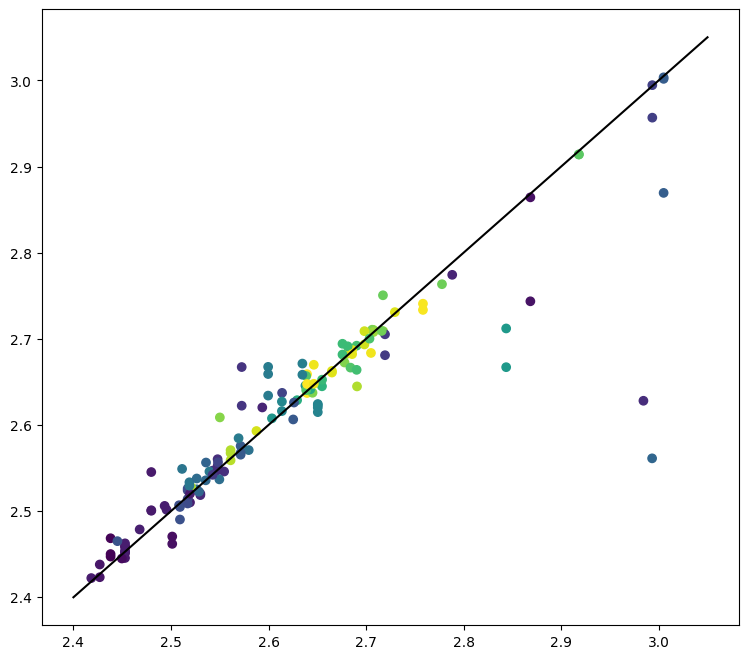

In [30]:
fig, ax = plt.subplots(figsize=(9, 8))

ax.scatter(y_test, y_pred, c=df['TOP_DEPTH'].loc[y_test.index])
# ax.scatter(y_train, catboost_reg.predict(X_train), marker='x', c=df['TOP_DEPTH'].loc[y_train.index])
ax.plot([2.4, 3.05], [2.4, 3.05], color='black')

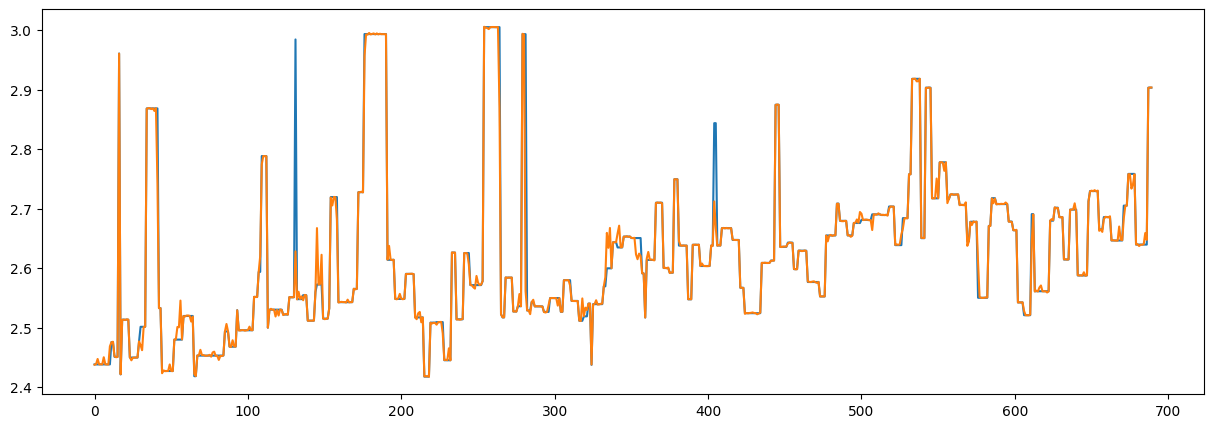

In [31]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(df['Bulk density (g/cm³)'])
ax.plot(catboost_reg.predict(X))

<BarContainer object of 113 artists>

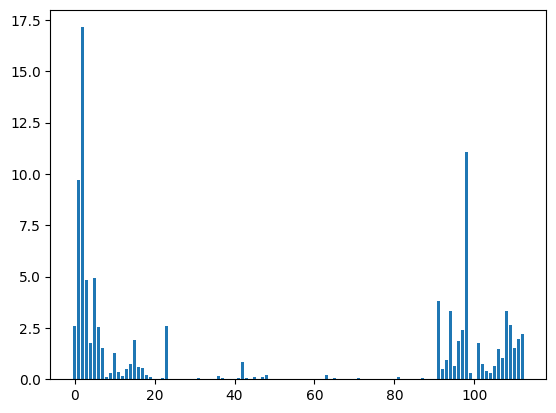

In [32]:
plt.bar(np.arange(0, catboost_reg.feature_importances_.shape[0], 1), catboost_reg.feature_importances_)

<Axes: >

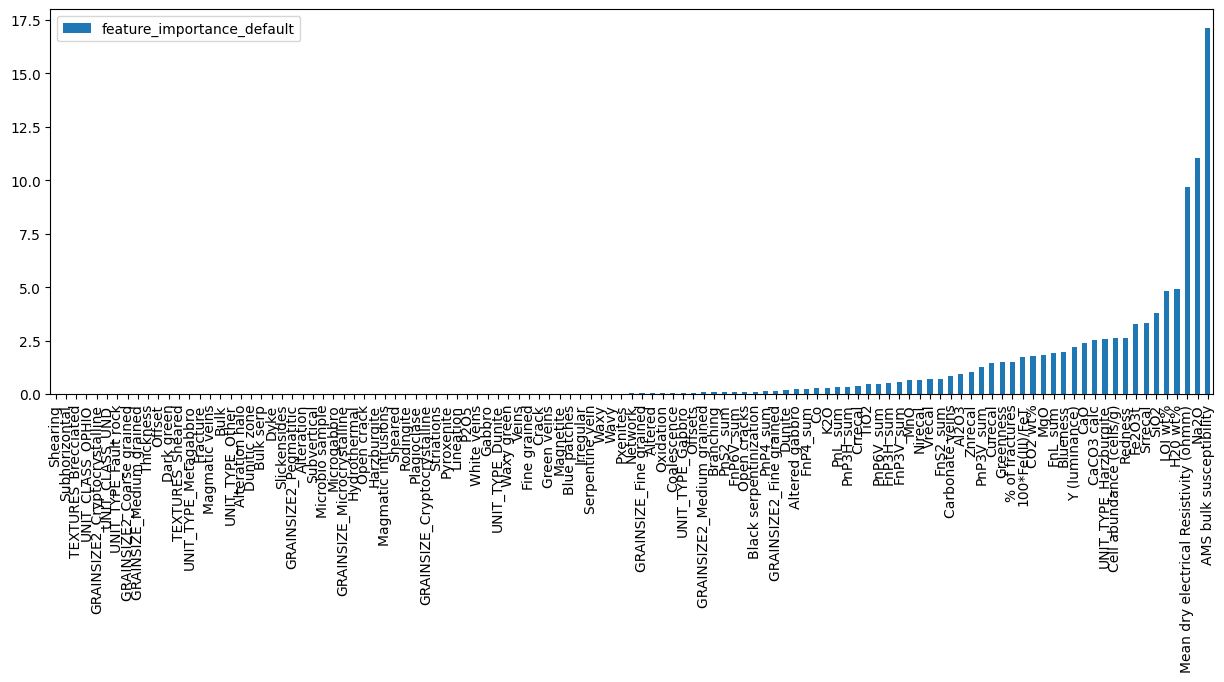

In [33]:
feature_df = pd.DataFrame({'feature_importance_default':catboost_reg.feature_importances_}, index=X_train.columns)
feature_df.sort_values('feature_importance_default').plot.bar(figsize=(15, 5))

In [34]:
!pip install shap

In [35]:
import shap


In [36]:
shap.initjs()


In [37]:
explainer = shap.TreeExplainer(catboost_reg)
shap_values = explainer(X)

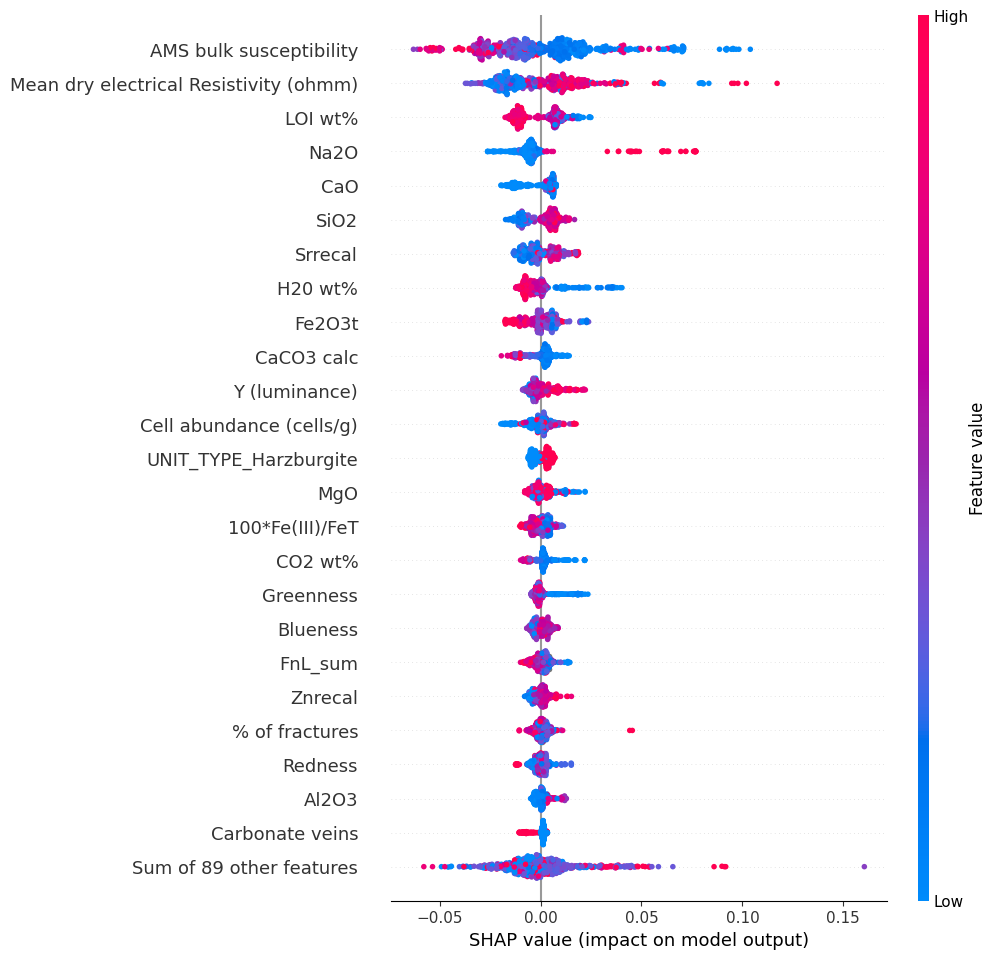

In [38]:
shap.plots.beeswarm(shap_values, max_display=25)


In [39]:
# shap_df = pd.Da taFrame({'shap_value':shap_values.values})#, columns=X.columns, index=df['TOP_DEPTH'])
shap_df = pd.DataFrame( columns=X.columns, index=df['TOP_DEPTH'])
# shap_df.values = shap_values.values
for n, c in enumerate(X.columns):
    shap_df[c] = shap_values.values[:,n]

shap_df

,Cell abundance (cells/g),Mean dry electrical Resistivity (ohmm),AMS bulk susceptibility,LOI wt%,CO2 wt%,H20 wt%,CaCO3 calc,% of fractures,PnS2_sum,PnL_sum,...,Crrecal,Co,Nirecal,Curecal,Znrecal,Srrecal,Redness,Greenness,Blueness,Y (luminance)
TOP_DEPTH,,,,,,,,,,,,,,,,,,,,,
0.00,-0.001652,0.008304,-0.053182,-0.011364,-0.008496,-0.003338,-0.010664,0.000893,0.000489,-0.000382,...,-0.002185,-0.001743,-0.001113,-0.004472,0.001453,-0.002457,-0.002220,-0.004525,-0.003722,-0.000346
0.50,-0.001799,0.007950,-0.053803,-0.011347,-0.008498,-0.003337,-0.010719,0.000764,0.000495,-0.000375,...,-0.002201,-0.001803,-0.001115,-0.004877,0.001477,-0.002457,-0.002219,-0.004040,-0.003720,-0.000325
0.91,-0.001360,0.008116,-0.054700,-0.009894,-0.008496,-0.003373,-0.010740,0.001243,0.000405,-0.000316,...,-0.002050,-0.001706,-0.000999,-0.004526,0.001147,-0.002539,-0.002108,-0.004350,-0.003551,-0.000358
1.19,-0.001340,0.007843,-0.054923,-0.011185,-0.008500,-0.003417,-0.010550,0.001259,0.000394,-0.000346,...,-0.002092,-0.001852,-0.000933,-0.004576,0.001038,-0.002543,-0.002110,-0.004369,-0.003722,-0.000364
1.60,-0.001317,0.008036,-0.054564,-0.011381,-0.008451,-0.003582,-0.010833,0.001149,0.000407,-0.000317,...,-0.002072,-0.001797,-0.001027,-0.004523,0.001168,-0.002586,-0.002150,-0.004400,-0.003531,-0.000385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399.65,0.000877,-0.007467,-0.010985,0.007643,0.000838,0.002456,0.001284,0.000256,0.000806,0.000371,...,-0.001041,0.000231,0.001069,0.001116,0.000934,0.005314,-0.000730,-0.001692,-0.001466,0.007917
400.10,0.000337,-0.007387,-0.010705,0.007468,0.001445,0.001526,0.001407,0.000382,0.000183,-0.000709,...,-0.000954,0.000170,0.001356,0.000835,0.000159,0.005339,-0.002346,-0.001838,-0.001584,0.007554
401.09,0.001051,0.006591,0.046882,0.015600,0.002062,0.035673,0.003437,0.002138,0.000936,0.000106,...,0.000407,0.001016,0.000969,0.001791,0.001057,0.012757,-0.000676,0.015114,0.004723,0.014011


<Axes: xlabel='TOP_DEPTH'>

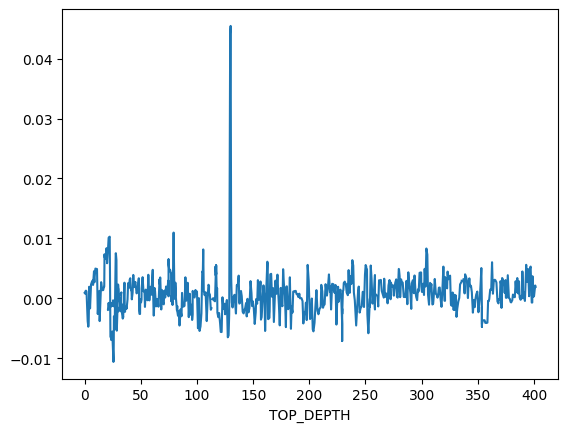

In [40]:
shap_df['% of fractures'].plot()

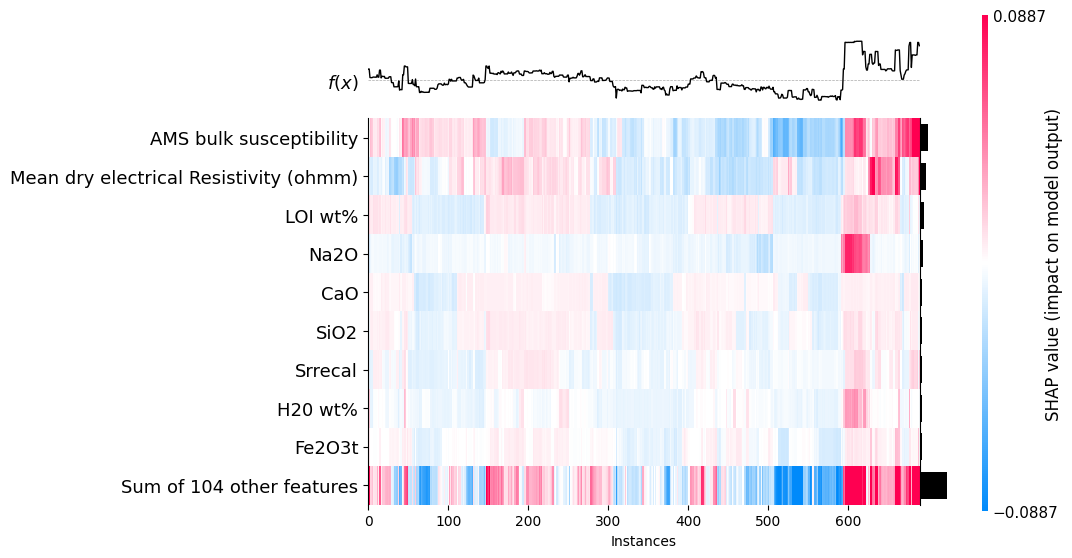

<Axes: xlabel='Instances'>

In [41]:
shap.plots.heatmap(shap_values)

In [42]:
# import matplotlib.pyplot as pl
# import numpy as np
# import matplotlib as mpl

from shap import Explanation
from shap.utils import OpChain
# from shap.utils import convert_ordering
# from . import colors
# from ._labels import labels
# from shap._utils import convert_ordering

def convert_ordering(ordering, shap_values):
    if issubclass(type(ordering), OpChain):
        ordering = ordering.apply(Explanation(shap_values))
    if issubclass(type(ordering), Explanation):
        if "argsort" in [op["name"] for op in ordering.op_history]:
            ordering = ordering.values
        else:
            ordering = ordering.argsort.flip.values
    return ordering

def heatmap(
    shap_values,
    instance_order=Explanation.hclust(),
    feature_values=Explanation.abs.mean(0),
    feature_order=None,
    max_display=10,
    # cmap=colors.red_white_blue,
    show=True,
    plot_width=8,
    ax=None,
):
    """Create a heatmap plot of a set of SHAP values.

    This plot is designed to show the population substructure of a dataset using supervised
    clustering and a heatmap.
    Supervised clustering involves clustering data points not by their original
    feature values but by their explanations.
    By default, we cluster using :func:`shap.utils.hclust_ordering`,
    but any clustering can be used to order the samples.

    Parameters
    ----------
    shap_values : shap.Explanation
        A multi-row :class:`.Explanation` object that we want to visualize in a
        cluster ordering.

    instance_order : OpChain or numpy.ndarray
        A function that returns a sort ordering given a matrix of SHAP values and an axis, or
        a direct sample ordering given as an ``numpy.ndarray``.

    feature_values : OpChain or numpy.ndarray
        A function that returns a global summary value for each input feature, or an array of such values.

    feature_order : None, OpChain, or numpy.ndarray
        A function that returns a sort ordering given a matrix of SHAP values and an axis, or
        a direct input feature ordering given as an ``numpy.ndarray``.
        If ``None``, then we use ``feature_values.argsort``.

    max_display : int
        The maximum number of features to display (default is 10).

    show : bool
        Whether ``matplotlib.pyplot.show()`` is called before returning.
        Setting this to ``False`` allows the plot
        to be customized further after it has been created.

    plot_width : int, default 8
        The width of the heatmap plot.

    ax : matplotlib Axes
        Axes object to draw the plot onto, otherwise uses the current Axes.

    Returns
    -------
    ax: matplotlib Axes
        Returns the Axes object with the plot drawn onto it.

    Examples
    --------
    See `heatmap plot examples <https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/heatmap.html>`_.

    """
    # sort the SHAP values matrix by rows and columns
    values = shap_values.values
    if issubclass(type(feature_values), OpChain):
        feature_values = feature_values.apply(Explanation(values))
    if issubclass(type(feature_values), Explanation):
        feature_values = feature_values.values
    if feature_order is None:
        feature_order = np.argsort(-feature_values)
    elif issubclass(type(feature_order), OpChain):
        feature_order = feature_order.apply(Explanation(values))
    elif not hasattr(feature_order, "__len__"):
        raise Exception(f"Unsupported feature_order: {str(feature_order)}!")
    # xlabel = "Instances"
    instance_order = convert_ordering(instance_order, shap_values)
    # if issubclass(type(instance_order), OpChain):
    #     #xlabel += " " + instance_order.summary_string("SHAP values")
    #     instance_order = instance_order.apply(Explanation(values))
    # elif not hasattr(instance_order, "__len__"):
    #     raise Exception("Unsupported instance_order: %s!" % str(instance_order))
    # else:
    #     instance_order_ops = None

    feature_names = np.array(shap_values.feature_names)[feature_order]
    values = shap_values.values[instance_order][:, feature_order]
    feature_values = feature_values[feature_order]

    return values, feature_names
    # if we have more features than `max_display`, then group all the excess features
    # into a single feature
    # if values.shape[1] > max_display:
    #     new_values = np.zeros((values.shape[0], max_display))
    #     new_values[:, :-1] = values[:, : max_display - 1]
    #     new_values[:, -1] = values[:, max_display - 1 :].sum(1)
    #     new_feature_values = np.zeros(max_display)
    #     new_feature_values[:-1] = feature_values[: max_display - 1]
    #     new_feature_values[-1] = feature_values[max_display - 1 :].sum()
    #     feature_names = [
    #         *feature_names[: max_display - 1],
    #         f"Sum of {values.shape[1] - max_display + 1} other features",
    #     ]
    #     values = new_values
    #     feature_values = new_feature_values
    #     return values
    # else:
    #     return values

[Text(0.5, 0, 'AMS bulk susceptibility'),
 Text(1.5, 0, 'Mean dry electrical Resistivity (ohmm)'),
 Text(2.5, 0, 'LOI wt%'),
 Text(3.5, 0, 'Na2O'),
 Text(4.5, 0, 'CaO')]

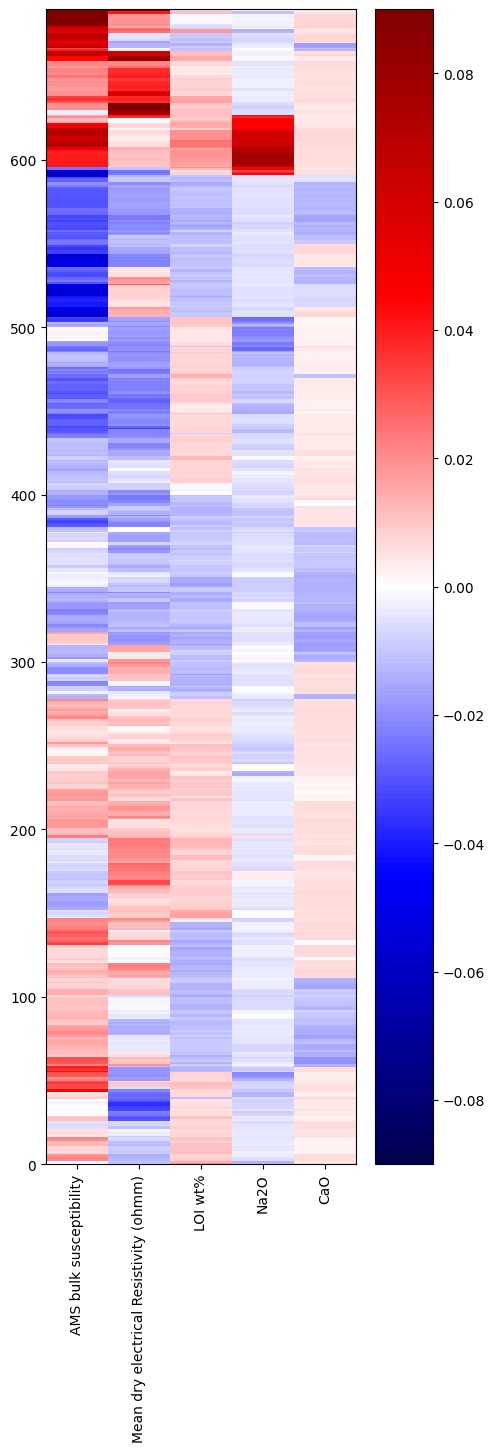

In [75]:
fig, ax = plt.subplots(figsize=(5, 15))
hm, featnames = heatmap(shap_values)
cbar = ax.pcolormesh(hm[:,0:5], cmap='seismic', vmin=-0.09, vmax=0.09)
fig.colorbar(cbar)
ax.set_xticks(np.arange(0, 5, 1)+0.5)
ax.set_xticklabels(featnames[0:5], rotation=90)

<Axes: xlabel='TOP_DEPTH'>

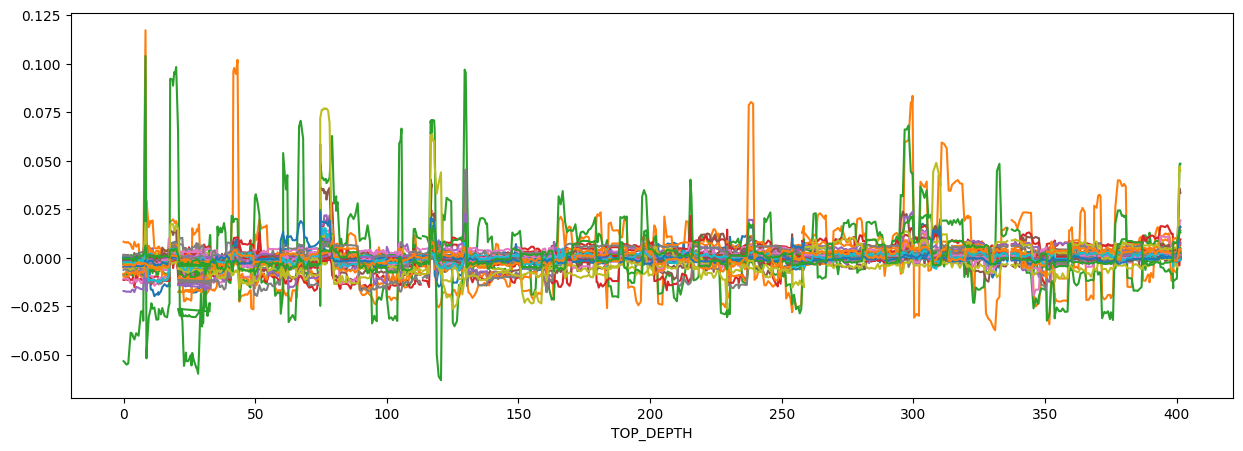

In [44]:
shap_df.plot(legend=False, figsize=(15,5))

In [45]:
for row in shap_df.iterrows():

    depth = row[0]
    row = row[1]
    
    print(depth, '\t', row.index[row.argmax()], '\t', row.max())
    

0.0 	 Mean dry electrical Resistivity (ohmm) 	 0.008303568213122399
0.5 	 Mean dry electrical Resistivity (ohmm) 	 0.007949732214344548
0.91 	 Mean dry electrical Resistivity (ohmm) 	 0.008116406029639069
1.19 	 Mean dry electrical Resistivity (ohmm) 	 0.007843407703374638
1.6 	 Mean dry electrical Resistivity (ohmm) 	 0.008036304434378614
1.78 	 Mean dry electrical Resistivity (ohmm) 	 0.007998214020438607
2.7 	 Mean dry electrical Resistivity (ohmm) 	 0.007012386495232947
3.25 	 Mean dry electrical Resistivity (ohmm) 	 0.004942902213249834
3.52 	 Mean dry electrical Resistivity (ohmm) 	 0.004705816773891016
3.6 	 Mean dry electrical Resistivity (ohmm) 	 0.004548234822915388
4.115 	 Mean dry electrical Resistivity (ohmm) 	 0.008271301410878527
4.815 	 Mean dry electrical Resistivity (ohmm) 	 0.005761083427482481
5.7 	 Mean dry electrical Resistivity (ohmm) 	 0.007124743181234295
6.62 	 % of fractures 	 0.0028237530048796787
7.37 	 % of fractures 	 0.0029741506686917453
7.475 	 % of fr